In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('JHipster-gp.csv') 

In [3]:
df.drop(columns=['Compile', 'Log-Build', 'Log-Compile', 'Log-Generate', 'Generate', 'JHipsterRegister', 'testFrameworks'], inplace=True)
df

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build
0,True,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
1,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
2,True,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
3,False,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
4,True,"""monolith""","""jwt""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mysql""","""maven""","""elasticsearch""",false,true,True,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""InMemory""","""mysql""","""gradle""","""elasticsearch""",true,false,True,OK
26252,True,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26253,False,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26254,True,"""monolith""","""session""","""no""","""no""","""no""","""sql""","""DiskBased""","""mariadb""","""maven""","""elasticsearch""",true,true,True,OK


In [4]:
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build
0,1,2,2,2,0,1,3,0,1,0,0,1,1,0,0
1,0,2,2,2,0,1,3,0,1,0,0,1,1,0,0
2,1,2,0,2,1,1,1,4,2,0,1,1,1,1,1
3,0,2,0,2,1,1,1,4,2,0,1,1,1,1,1
4,1,2,0,2,0,1,3,0,3,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,0,2,2,2,0,1,3,1,3,0,0,2,1,1,1
26252,1,2,1,2,0,0,3,7,5,0,0,1,1,1,1
26253,0,2,1,2,0,0,3,7,5,0,0,1,1,1,1
26254,1,2,2,2,1,0,3,0,1,1,0,2,2,1,1


In [5]:
df.apply(LabelEncoder().fit_transform)["databaseType"].unique()

array([3, 1, 0, 2])

In [6]:
df["databaseType"].unique()

array(['"sql"', '"mongodb"', '"cassandra"', '"no"'], dtype=object)

In [7]:
df

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build
0,True,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
1,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
2,True,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
3,False,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
4,True,"""monolith""","""jwt""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mysql""","""maven""","""elasticsearch""",false,true,True,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""InMemory""","""mysql""","""gradle""","""elasticsearch""",true,false,True,OK
26252,True,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26253,False,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26254,True,"""monolith""","""session""","""no""","""no""","""no""","""sql""","""DiskBased""","""mariadb""","""maven""","""elasticsearch""",true,true,True,OK


In [8]:
X = df_encoded.drop(columns=["Build"])
y = df_encoded["Build"]

In [9]:
test_size=0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

clf = RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9658076255765732

In [10]:
test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9673979280926265

In [11]:
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9729626808834729

In [29]:
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9284082254379284

In [30]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 190.26, 'authenticationType <= 2.5\ngini = 0.459\nsamples = 23630\nvalue = [8425, 15205]'),
 Text(83.7, 135.9, 'prodDatabaseType <= 2.5\ngini = 0.366\nsamples = 19578\nvalue = [4712, 14866]'),
 Text(41.85, 81.53999999999999, 'buildTool <= 0.5\ngini = 0.482\nsamples = 6860\nvalue = [4087, 2773]'),
 Text(20.925, 27.180000000000007, 'gini = 0.092\nsamples = 3421\nvalue = [3256, 165]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.367\nsamples = 3439\nvalue = [831, 2608]'),
 Text(125.55000000000001, 81.53999999999999, 'Docker <= 0.5\ngini = 0.093\nsamples = 12718\nvalue = [625, 12093]'),
 Text(104.625, 27.180000000000007, 'gini = 0.008\nsamples = 6369\nvalue = [25, 6344]'),
 Text(146.475, 27.180000000000007, 'gini = 0.171\nsamples = 6349\nvalue = [600, 5749]'),
 Text(251.10000000000002, 135.9, 'applicationType <= 2.0\ngini = 0.153\nsamples = 4052\nvalue = [3713, 339]'),
 Text(209.25, 81.53999999999999, 'Docker <= 0.5\ngini = 0.012\nsamples = 3641\nvalue = [3619, 22]

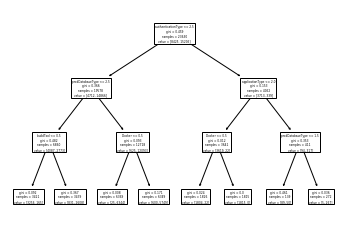

In [31]:
plot_tree(clf, feature_names=X.columns) 

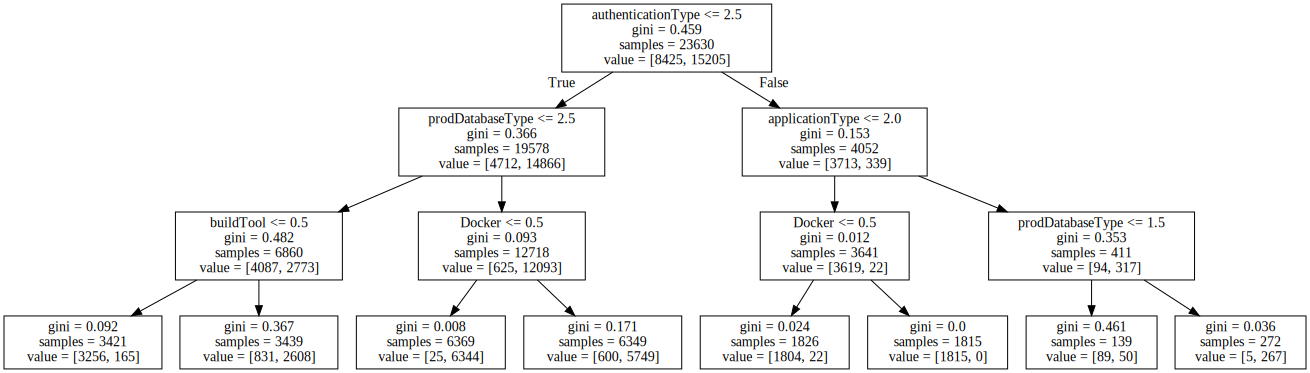

In [32]:
from graphviz import Source
from IPython.display import SVG
graph = Source( export_graphviz(clf, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

In [16]:
graph = Source( export_graphviz(clf, out_file=None, feature_names=X.columns))
graph.format = 'pdf'
graph.render('dtree_render', view=True)

'dtree_render.pdf'

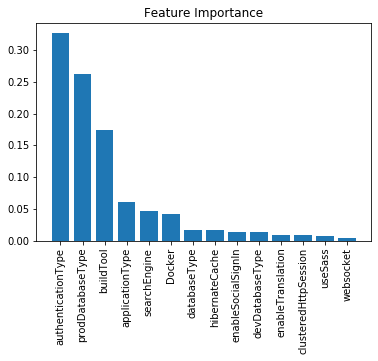

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/

importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [35]:
df.query('databaseType == `"sql"`')

UndefinedVariableError: name 'sql' is not defined

In [23]:
df['prodDatabaseType'].unique()

array(['"mariadb"', '"mongodb"', '"mysql"', '"postgresql"', '"cassandra"',
       '"no"'], dtype=object)

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build
0,True,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
1,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
2,True,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
3,False,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
4,True,"""monolith""","""jwt""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mysql""","""maven""","""elasticsearch""",false,true,True,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""InMemory""","""mysql""","""gradle""","""elasticsearch""",true,false,True,OK
26252,True,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26253,False,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26254,True,"""monolith""","""session""","""no""","""no""","""no""","""sql""","""DiskBased""","""mariadb""","""maven""","""elasticsearch""",true,true,True,OK
